In [17]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")
# df = pd.read_csv(r"./data/20200124_ews_observations.csv", index_col =1, parse_dates = ['ObservationDate'])
df = pd.read_csv(r"./data/20200124_ews_observations.csv", parse_dates = True)
df  = df.drop('EwsProcedure',1)
df  = df.drop('LOC',1)
df

,PatientId,ObservationDate,EWS_Total,SBP,SBP_Score,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,0,143.0,0.0,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,3,NaN,NaN,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,1,117.0,0.0,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,0,NaN,NaN,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,0,135.0,0.0,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05.0000000,3,88.0,3.0,0,100.0,0.0,False,0.0,72,0,14,0,36.1,0
171732,20480,2020-01-02 08:58:46.0000000,3,83.0,3.0,0,92.0,0.0,False,0.0,79,0,18,0,36.8,0
171733,2499,2020-01-02 09:03:14.0000000,0,118.0,0.0,0,98.0,0.0,False,0.0,82,0,20,0,36.2,0
171734,20527,2020-01-02 09:03:20.0000000,0,129.0,0.0,0,98.0,0.0,False,0.0,70,0,16,0,36.5,0


In [18]:
# df['EWS_Total'].resample('Y').mean()
df = df[df['PatientId']==31]
# df = df.reset_index(drop=True)
df.shape

(34, 16)

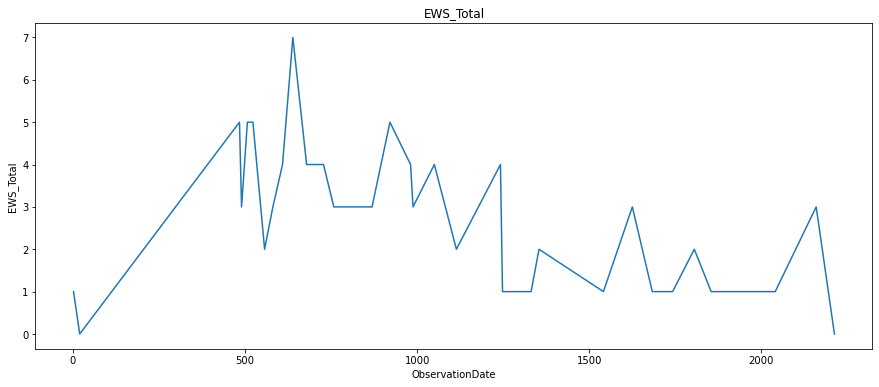

In [19]:
df["EWS_Total"].plot(figsize=(15, 6))
plt.xlabel("ObservationDate")
plt.ylabel("EWS_Total")
plt.title("EWS_Total")
plt.show()

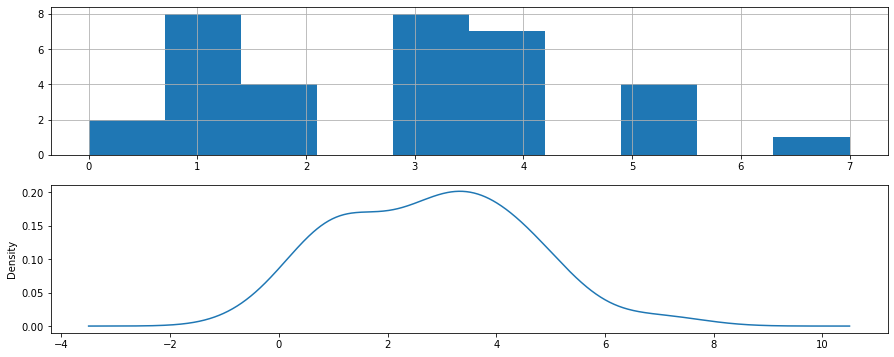

In [20]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["EWS_Total"].hist()
plt.subplot(212)
df["EWS_Total"].plot(kind='kde')
plt.show()

In [5]:
X = df[['EWS_Total']]
 
train, test = X[0:-30], X[-30:]

In [6]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
 max_p=7, max_q=7, seasonal=False,
 d=None, trace=True,error_action='ignore',suppress_warnings=True,
stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20.571, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22.542, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22.028, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.166 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    4
Model:                        SARIMAX   Log Likelihood                  -8.286
Date:                Thu, 07 Jan 2021   AIC                             20.571
Time:                        11:22:27   BIC                             19.344
Sample:                             0   HQIC                            17.878
                                  - 4                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2500      1.032      2.180      0.029       0.227       4.273
sigma2         3.6875      5.235      0.704      0.481      -6.574      13.949
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.80   Prob(JB):                         0.82
Heteroskedasticity (H):                nan   Skew:                             0.28
Prob(H) (two-sided):                   nan   Kurtosis:                         1.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(2359, 2389)
# df_conf["new_index"] = range(89, 119)
df_conf = df_conf.set_index("new_index")
 

In [10]:
forecast["new_index"] = range(2359, 2389)
forecast = forecast.set_index("new_index")

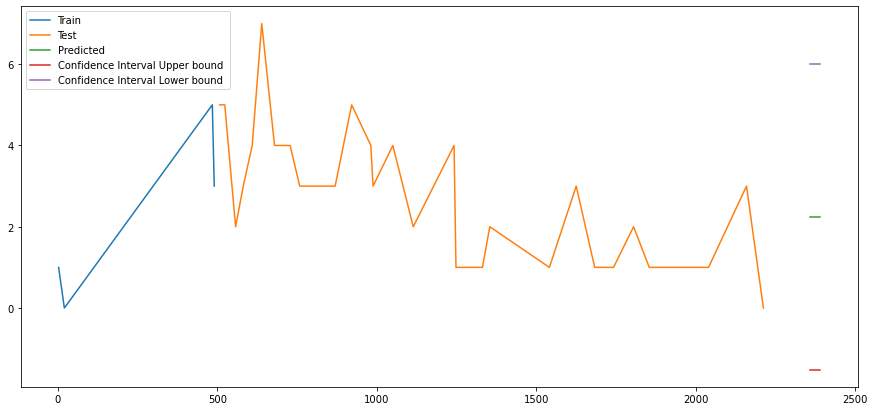

In [11]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()